## Telco - Customer Churn Prediction
My objective is first to do an EDA on this dataset and bring about any useful stories that lies within the data. Further analysis will have to be performed in a separate modeling exercise/notebook to address the actual customer churn problem. 

The dataset includes the following information with regards to customers of Telco:
- Customers who left within the last month – Churn column
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Our methodology will include the following steps:
- Data wrangling
- Exploratory Data Analysis (EDA)
- Modeling (Separate analysis)
- Evaluation (Separate analysis)

### Import of necessary libraries

In [5]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Load Telco dataset
telco_data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
# Summary of the dataset
telco_data.info()

# 7043 rows by 21 columns
# There are no null values that need to be addressed in first look, but we will need to look further
# TotalCharges column is of object type so we need to review that one

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory Data Analysis

In [9]:
# Check missing values
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Trying to convert 'TotalCharges' throws an errorwhich means there is a non-digit entry in the column
telco_data['TotalCharges'].astype('float32') # ValueError: could not convert string to float: ''

ValueError: could not convert string to float: ''

In [67]:
# Let's find how many of these empty space characters we have
np.where(telco_data['TotalCharges']==' ',1,0).sum()

11

In [ ]:
# Alternatively, 
# # Let's find the space characters in the Total Charges column using regex lib
# def find_space(Series):
#     spaced_rows=[]
#     for row in Series:
#         if re.findall('[ ]',row):
#            spaced_rows.append(re.findall('[ ]',row))
#     return len(spaced_rows)
# find_space(telco_data['TotalCharges'])
# There are 11 space/none characters in this column

# If we want to find empty space chars in the other columns
# for i in telco_data.select_dtypes(include='object'):
#     print (i+':'+str(find_space(telco_data[i])))

In [153]:
# This is the dataset looks like filtered to these 11 space values
telco_data[telco_data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [154]:
# Replace the space chars with Nan value
telco_data['TotalCharges'] = telco_data['TotalCharges'].replace([' '], np.nan)

# Convert the column to numeric
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'])

### What is the percentage of Churn (label) in the dataset?

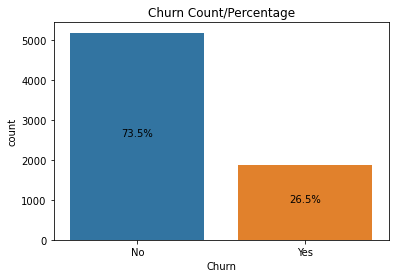

In [11]:
# Countplot of our target variable: 'Churn' and the corresponding percentages
# We can see class imbalance in the customer base: Yes to No about 3 times
ax = sns.countplot(x="Churn", data=telco_data)
plt.title('Churn Count/Percentage')
for p in ax.patches: # patches objects are the individual bars
    percentage = '{:.1f}%'.format(100 * p.get_height() / float(len(telco_data))) #get_height: return the height of the bars that correspond to the counts
    x = p.get_x() + p.get_width()/2 # x-coordinate: get_x returns the left coordinate of the bars and then add half of the width
    y = p.get_height()/2 # y-coordinate: mid-point in the bar
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

### Independent Features

In [12]:
# The binary category features
binary_cols = [i for i in telco_data if telco_data[i].value_counts().shape[0]==2][:-1] # we want to exclude Churn dependent column
# The non-binary category features
non_binary_cols = [i for i in telco_data if telco_data[i].value_counts().shape[0]!=2]

In [13]:
non_binary_cols

['customerID',
 'tenure',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

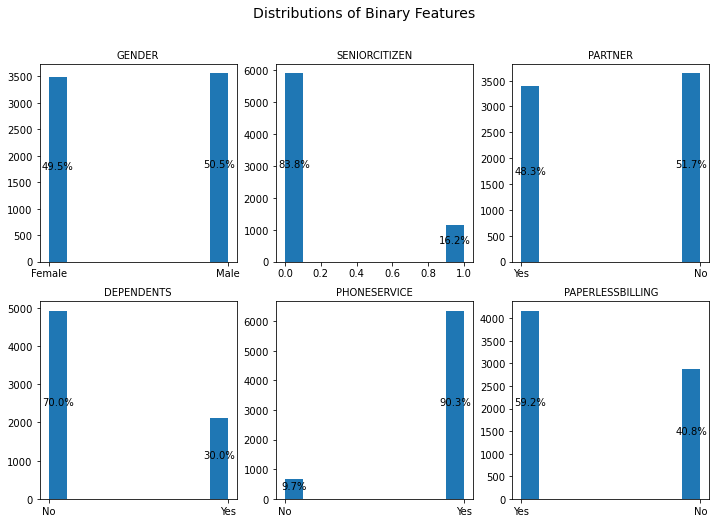

In [14]:
# Let's look at the distribution of binary features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
fig.suptitle('Distributions of Binary Features', fontsize=14)
for ax, feature, name in zip(axes.flatten(), np.array(telco_data[binary_cols].T), binary_cols): # Make the the actual data into an array for each feature
    ax.hist(feature)
    ax.set_title(name.upper(), fontsize=10)
    for p in ax.patches:
        percentage = 100 * p.get_height() / float(len(telco_data[binary_cols]))
        percentage_str = '{:.1f}%'.format(percentage) #get_height: return the height of the bars that correspond to the counts
        x = p.get_x() + p.get_width()/2 # get_x: return the left coordinate of the bars
        y = p.get_height()/2
        if percentage > 0.0:
            ax.annotate(percentage_str, (x, y), ha='center') 

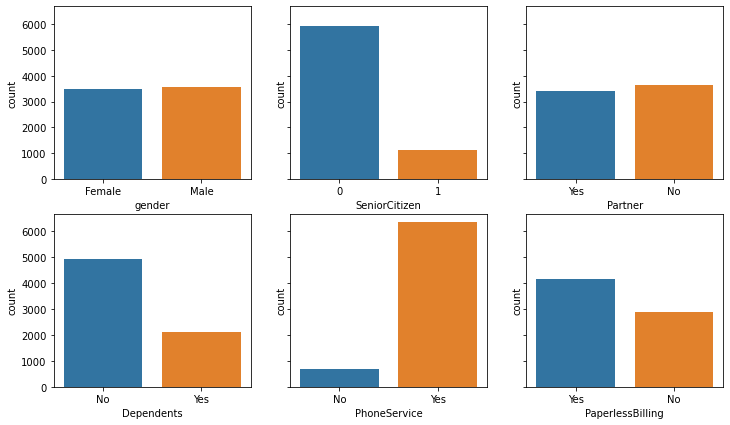

In [126]:
# Alternatively using Seaborn,
# Plot the binary categorical features using seaborn
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
ax1=sns.countplot("gender", data=telco_data, ax=axes[0,0])
ax2=sns.countplot("SeniorCitizen", data=telco_data, ax=axes[0,1])
ax3=sns.countplot("Partner", data=telco_data, ax=axes[0,2])
ax4=sns.countplot("Dependents", data=telco_data, ax=axes[1,0])
ax5=sns.countplot("PhoneService", data=telco_data, ax=axes[1,1])
ax6=sns.countplot("PaperlessBilling", data=telco_data, ax=axes[1,2])

plt.show()

In [ ]:
# Churn rate among the binary features
for i in binary_cols:
    print(telco_data[[i,'Churn']].groupby(i).mean())

We can point out the following observations from these distributions:
- There seems to be an equal gender balance in the dataset which means the gender may not contribute to a churn prediction problem.
- Partner column also presents a balanced class.
- About 16% of customers are Senior Citizens
- Majority of the cunsomers are subscribed to Phone Service.
- 70% of customers have dependents
- 60% of customers are subscribed to paperless billing.

### Relationship between Tenure and Monthly Charges vs Churn

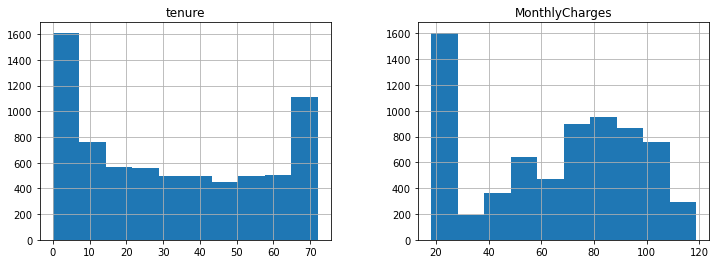

In [146]:
# These are the distibutions of the two quantitative features
telco_data[['tenure', 'MonthlyCharges']].hist(figsize=(12,4));

Text(0.5, 1.0, 'Distribution of Monthly Charges by Churn')

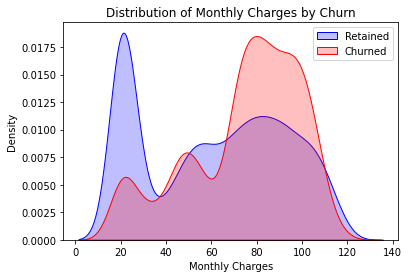

In [149]:
# Churn by monthly charges
ax = sns.kdeplot(telco_data[(telco_data["Churn"] == 'No')]['MonthlyCharges'],
               color = "Blue", shade = True)
ax = sns.kdeplot(telco_data[(telco_data["Churn"] == 'Yes')]['MonthlyCharges'],
               color = "Red", shade = True)

ax.legend(["Retained", "Churned"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Monthly Charges")
ax.set_title("Distribution of Monthly Charges by Churn")

Text(0.5, 1.0, 'Distribution of Tenure by Churn')

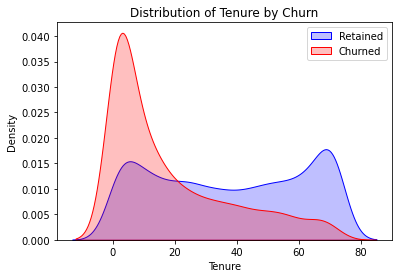

In [148]:
# Churn by Tenure
ax = sns.kdeplot(telco_data[(telco_data["Churn"] == 'No')]['tenure'],
               color = "Blue", shade = True)
ax = sns.kdeplot(telco_data[(telco_data["Churn"] == 'Yes')]['tenure'],
               color = "Red", shade = True)

ax.legend(["Retained", "Churned"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Tenure")
ax.set_title("Distribution of Tenure by Churn")

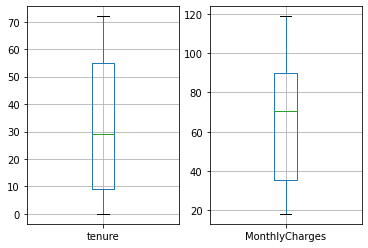

In [34]:
# Generate a simple boxplot of our continuous variables 'tenure' and 'MonthlyCharges'.
# This shows no outlier issues
fig, axes = plt.subplots(1, 2)
telco_data.boxplot(["tenure"],ax=axes[0])
telco_data.boxplot(["MonthlyCharges"],ax=axes[1])
plt.show()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

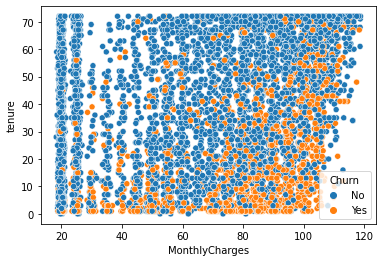

In [150]:
# Let's see the realtionship between Monthly Charges and Tenure
sns.scatterplot(telco_data['MonthlyCharges'],telco_data['tenure'], hue=telco_data['Churn'])

We can see from these plots that the higher the monthly charges are, the higher the Churn density seems to be. However, inititally up until 20$ the retention is high, then it dips and then it increases again at higher charges. I think as people stay longer, they do get used to a bit higher charges and dont churn as quickly. At about 60$ the churn starts to spike again. # churn rate changes according to tenure and MonthlyCharges

In [280]:
# Churn rates according to tenure and MonthlyCharges
telco_data[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


People who tend to have longer tenure with the company (long term customers), they tend to churn less. Also, for subscribers who churn, monthly charges are higher.

### Phone Service, Multiple Lines and Churn

In [63]:
# Subscribers that do not have a phone service will not have any multiple lines, so MultipleLines column includes more specific data than PhoneService. PhoneService can be ignored in modeling.
pd.pivot_table(telco_data, values='Churn', index=['PhoneService'], columns=['MultipleLines'], aggfunc=np.mean)

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,NaN,0.249267,NaN
Yes,0.250442,NaN,0.286099


In [57]:
# The churn rates are pretty even in Phone Services and Multiple Lines
print(telco_data[['PhoneService','Churn']].groupby('PhoneService').mean())
print(telco_data[['MultipleLines','Churn']].groupby('MultipleLines').mean())

                 Churn
PhoneService          
No            0.249267
Yes           0.267096
                     Churn
MultipleLines             
No                0.250442
No phone service  0.249267
Yes               0.286099


### Internet Service related Features

In [200]:
# Internet Service is an important feature. You can only have access to these services ONLY if you have an Internet Service
telco_data[telco_data['InternetService']=='No'][[If a customer does not have a phone service, he/she cannot have multiple lines.]]

,StreamingTV,StreamingMovies,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport
11,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
16,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
21,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
22,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
33,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
...,...,...,...,...,...,...
7017,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7019,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7020,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7030,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

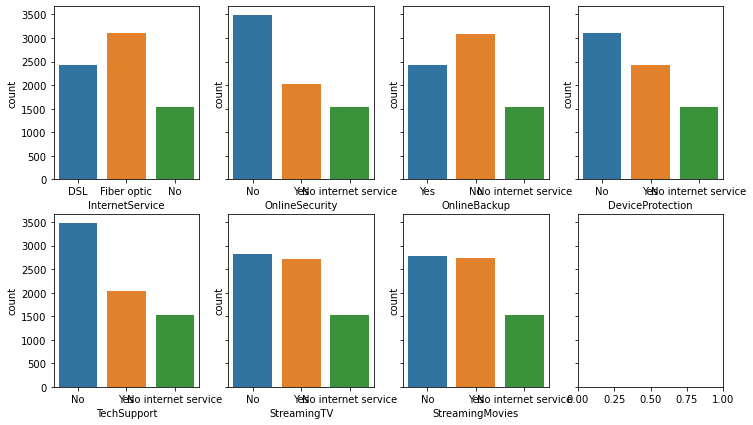

In [251]:
# Let's look at their distributions
fig, axes = plt.subplots(2, 4, figsize=(12, 7), sharey=True)
sns.countplot("InternetService", data=telco_data, ax=axes[0,0])
sns.countplot("OnlineSecurity", data=telco_data, ax=axes[0,1])
sns.countplot("OnlineBackup", data=telco_data, ax=axes[0,2])
sns.countplot("DeviceProtection", data=telco_data, ax=axes[0,3])
sns.countplot("TechSupport", data=telco_data, ax=axes[1,0])
sns.countplot("StreamingTV", data=telco_data, ax=axes[1,1])
sns.countplot("StreamingMovies", data=telco_data, ax=axes[1,2])

In [35]:
# Let's also make the Churn label numeric for ease of further analysis
churn_numeric = {'Yes':1, 'No':0}
telco_data['Churn'].replace(churn_numeric, inplace=True)

We can point out the following observations from these distributions:
- There are high number of Fiber Optic (High Speed) subscribers among the internet services
- There are more BackUp users than Online Security and Device Protection users
- Streamimg services (TV and movie) seem pretty balanced among the subscribers

In [51]:
# Internet service related features also seem to have relatively different churn rates.
cols_IntServ = ['InternetService','StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport']
for i in cols_IntServ:
    print(telco_data[[i,'Churn']].groupby(i).mean())

                    Churn
InternetService          
DSL              0.189591
Fiber optic      0.418928
No               0.074050
                        Churn
StreamingTV                  
No                   0.335231
No internet service  0.074050
Yes                  0.300702
                        Churn
StreamingMovies              
No                   0.336804
No internet service  0.074050
Yes                  0.299414
                        Churn
OnlineSecurity               
No                   0.417667
No internet service  0.074050
Yes                  0.146112
                        Churn
OnlineBackup                 
No                   0.399288
No internet service  0.074050
Yes                  0.215315
                        Churn
DeviceProtection             
No                   0.391276
No internet service  0.074050
Yes                  0.225021
                        Churn
TechSupport                  
No                   0.416355
No internet service  0.074050


### Correlation of features

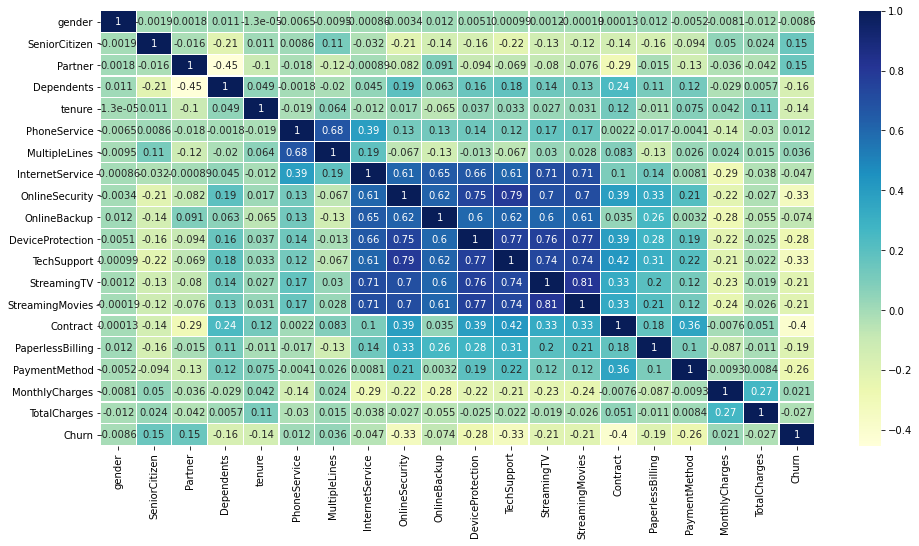

In [ ]:
# Plotting a correlation heatmap to give us a visual representation of our correlation matrix. 
plt.figure(figsize=(16, 8))
corr = telco_data.iloc[:,1:].apply(lambda x: pd.factorize(x)[0]).corr() # To display multiple categorical values in numerical arrays to run the correlation method
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot=True)

Internet Service and the following features seem to be highly correlated: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies. Not suprisingly, these variables only exist if you have Internet Service. 

As expected, phone services and multiple lines are correlated and so as, monthly charges and total charges.

### Internet Services and Churn Relationship

In [243]:
telco_data[['InternetService','Churn']].groupby(['InternetService']).describe().iloc[:,:3]

Churn                    
                  count      mean       std
InternetService                            
DSL              2421.0  0.189591  0.392058
Fiber optic      3096.0  0.418928  0.493463
No               1526.0  0.074050  0.261938

In [244]:
telco_data[['InternetService', 'MonthlyCharges']].groupby(['InternetService']).describe().iloc[:,:3]

MonthlyCharges                      
                         count       mean        std
InternetService                                     
DSL                     2421.0  58.102169  16.259522
Fiber optic             3096.0  91.500129  12.663039
No                      1526.0  21.079194   2.164221

Fiber optic internet service subscribers are more likely to churn than others although there is not a big difference in the counts of customers with DSL and fiber optic. This is also evident in Monthly Charges vs Internet Service as well. It seems like since the average Fiber price is higher than others, the Churn is more likely with these subscribers.

### Contract and Churn
As expected, customers with short-term contract are more likely to churn. That is why companies strive to get long-term customer subscriptions,

### Payment Method and Churn
Customers who pay with electronic check are more likely to churn even though this kind of payment is more common.

In [248]:
pd.pivot_table(telco_data, values='Churn', index=['InternetService'], columns=['Contract', 'PaymentMethod'], aggfunc=np.mean).T

InternetService                                DSL  Fiber optic        No
Contract       PaymentMethod                                             
Month-to-month Bank transfer (automatic)  0.197970     0.455657  0.200000
               Credit card (automatic)    0.270270     0.416382  0.092308
               Electronic check           0.405063     0.603673  0.188406
               Mailed check               0.307902     0.507463  0.206154
One year       Bank transfer (automatic)  0.075862     0.146497  0.044944
               Credit card (automatic)    0.098837     0.153333  0.013158
               Electronic check           0.094828     0.260204  0.057143
               Mailed check               0.102190     0.194444  0.012195
Two year       Bank transfer (automatic)  0.013393     0.092593  0.005618
               Credit card (automatic)    0.021097     0.038961  0.010526
               Electronic check           0.068966     0.097826  0.000000
               Mailed check               0.000000     0.047619  0.007937

## Summary
- There is a class imbalance for Churn label in the dataset. There is a 76%-24% difference between retained and churned. This can be addressed at preprocessing stage.
- There seems to be an equal gender balance in the dataset which means the gender may not contribute to a churn prediction problem.
- Most of the customers are not senior and similarly, most customers have a phone service.
- Phone services and multiple lines are correlated and so as, monthly charges and total charges.
- Subscribers with higher monthly charges tend to churn more
- Longer the tenure and contract term are, less churn there is among the subscribers. Customers with short-term contract are more likely to churn.
- Electronic Payment is the most common payment method, but the churn rate is higher in this group.
- Internet Service is a prominent feature that is correlated with numerous other features: 'StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport'. 
- Subsribers with no online security, backup or tech support tend to churn more. FiberOptic service is the most popular internet service, but it has the highest churn rate as well.